In [6]:
import pandas as pd
import numpy as np
from pmdarima import auto_arima
import matplotlib.pyplot as plt



In [7]:
# Load your dataset
data = pd.read_csv('D:\stubble buring\stubble\STN1.csv', parse_dates=['DATE'], dayfirst=True)
data.set_index('DATE', inplace=True)


<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\goelk\AppData\Local\Temp\ipykernel_20608\1564224310.py:2: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('D:\stubble buring\stubble\STN1.csv', parse_dates=['DATE'], dayfirst=True)


In [8]:
# Forward fill missing values for the period with gaps
data.fillna(method='ffill', inplace=True)


C:\Users\goelk\AppData\Local\Temp\ipykernel_20608\745624939.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [9]:
# Resample to monthly frequency by summing daily values
monthly_data = data.resample('M').sum()


C:\Users\goelk\AppData\Local\Temp\ipykernel_20608\756875591.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').sum()


In [10]:
# Determine the split point (70% of the data for training)
split_date = '2018-01-01'  # Approximate 70% for training
train_data = monthly_data[:split_date]
test_data = monthly_data[split_date:]


In [11]:
# Fit Auto ARIMA model on the training data
model = auto_arima(train_data['FIRECOUNT'], 
                   seasonal=True, 
                   m=12,               # 12 months seasonality
                   trace=True,         # Show model diagnostics
                   error_action='ignore',  
                   suppress_warnings=True)

# Check model summary
print(model.summary())



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1391.412, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1373.643, Time=0.03 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1363.555, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1395.668, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=1368.836, Time=0.02 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=1364.170, Time=0.05 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=1358.282, Time=0.15 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=1356.708, Time=0.21 sec
 ARIMA(0,0,1)(2,0,2)[12] intercept   : AIC=1358.700, Time=0.46 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=1365.862, Time=0.13 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=1383.501, Time=0.14 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=1358.724, Time=0.26 sec
 ARIMA(0,0,2)(1,0,2)[12] intercept   : AIC=1357.974, Time=0.27 sec
 ARIMA(1,0,0)(1,0,2)[12]

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Forecast for the next 48 months (4 years)
forecast_period = 48
forecast = model.predict(n_periods=forecast_period)

# Create forecast date index for 2022-2025
forecast_dates = pd.date_range(start='2022-01-01', periods=forecast_period, freq='ME')
forecast_series = pd.Series(forecast, index=forecast_dates)

# Assuming you have actual values for the forecast period (replace with your actual test data)
actual_values = test_data['FIRECOUNT']  # Replace 'your_column' with the actual column name from your test set

# Calculate MAE and RMSE
mae = mean_absolute_error(actual_values, forecast)
rmse = np.sqrt(mean_squared_error(actual_values, forecast))

# Display MAE and RMSE
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Display predictions
for year, value in zip(range(2022, 2026), forecast[:48:12]):
    print(f"The predicted value for {year} is {value:.2f}")


Mean Absolute Error (MAE): 5385.04
Root Mean Squared Error (RMSE): 15034.56
The predicted value for 2022 is 1488.37
The predicted value for 2023 is 896.58
The predicted value for 2024 is 518.10
The predicted value for 2025 is -277.19


In [13]:
import pandas as pd
import plotly.express as px

# Forecast for the next 48 months (4 years)
forecast_period = 48
forecast = model.predict(n_periods=forecast_period)

# Create forecast date index for 2022-2025
forecast_dates = pd.date_range(start='2022-01-01', periods=forecast_period, freq='ME')
forecast_series = pd.Series(forecast, index=forecast_dates)

# Display predictions
for year, value in zip(range(2022, 2026), forecast[:48:12]):
    print(f"The predicted value for {year} is {value:.2f}")

# Plot the forecast using Plotly Express
fig = px.line(forecast_series, x=forecast_series.index, y=forecast_series.values, 
              labels={'x': 'Date', 'y': 'forecast_dates'}, 
              title='Forecast for the Next 48 Months')

# Show the plot
fig.show()


The predicted value for 2022 is 1488.37
The predicted value for 2023 is 896.58
The predicted value for 2024 is 518.10
The predicted value for 2025 is -277.19


Predicted values for the next 48 months:
Month 1: 1488.3657493079586
Month 2: -1.1403279288128616e-11
Month 3: 1.8205671563883853e-11
Month 4: 3.822424325194734e-12
Month 5: -2.4716366273504037e-11
Month 6: -1.0424261321014787e-11
Month 7: 6.930585705317477e-12
Month 8: 1.1253549083882608
Month 9: 199.88923915210302
Month 10: 19999.52911400112
Month 11: 19599.36958432299
Month 12: 524.0622831959739
Month 13: 896.5767507234067
Month 14: 5.784802216010367e-12
Month 15: 8.192096126591199e-13
Month 16: 3.6857275624043775e-12
Month 17: 6.209829833230589e-12
Month 18: 2.3808002762052206e-12
Month 19: -4.055445771675528e-12
Month 20: 5.13279455385451
Month 21: -37.58599999815567
Month 22: -811.8294045664261
Month 23: -6390.1884571963155
Month 24: -809.1301521727362
Month 25: 518.1018478405898
Month 26: -3.094942525390246e-12
Month 27: -4.382875287265721e-13
Month 28: -1.971910973605497e-12
Month 29: -3.3223376891107053e-12
Month 30: -1.2737583315977584e-12
Month 31: 2.1697149028595513e-12
Mon

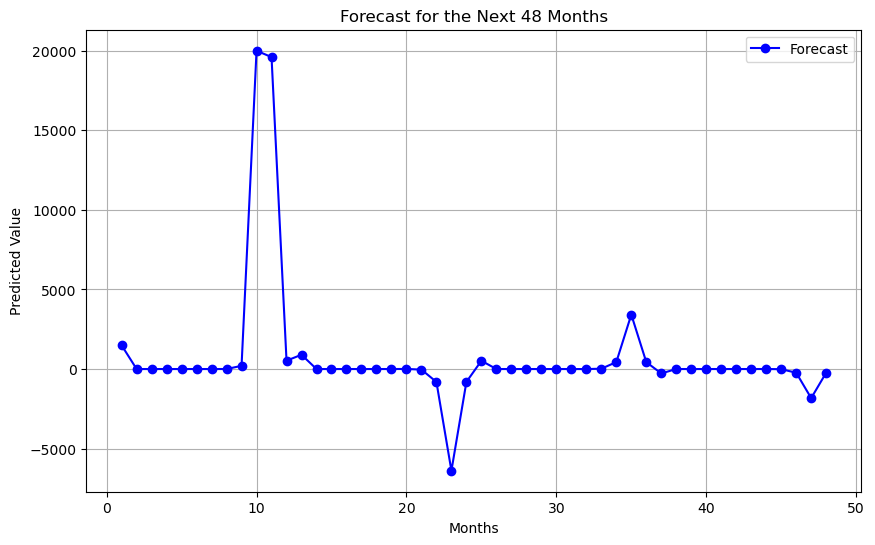

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming 'model' is already trained and forecast_period is set to 48 (next 48 months)
forecast_period = 48
forecast = model.predict(n_periods=forecast_period)

# Display all predicted values
print("Predicted values for the next 48 months:")
for i, value in enumerate(forecast, start=1):
    print(f"Month {i}: {value}")

# Plotting the forecast
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, forecast_period + 1), forecast, marker='o', linestyle='-', color='b', label='Forecast')
plt.title("Forecast for the Next 48 Months")
plt.xlabel("Months")
plt.ylabel("Predicted Value")
plt.legend()
plt.grid(True)
plt.show()


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = 'D:\\stubble buring\\stubble\\STN1.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the dataset
data.head()

# Parse the DATE column as datetime
data['DATE'] = pd.to_datetime(data['DATE'], format='%d-%m-%Y')

# Check for missing values in the dataset
missing_summary = data.isnull().sum()

# Aggregate daily data into monthly data by summing
data.set_index('DATE', inplace=True)
monthly_data = data.resample('M').sum()

# Fill missing values using linear interpolation for simplicity
monthly_data_imputed = monthly_data.interpolate(method='linear')

# Verify if missing values are handled
missing_summary_after_imputation = monthly_data_imputed.isnull().sum()

# Split the data into training (70%) and testing (30%) based on years
# Identify the cutoff year for 70% of the data
cutoff_year = int(len(monthly_data_imputed) * 0.7)
train_data = monthly_data_imputed.iloc[:cutoff_year]
test_data = monthly_data_imputed.iloc[cutoff_year:]

# Display the shapes of the split data
train_data.shape, test_data.shape


C:\Users\goelk\AppData\Local\Temp\ipykernel_20608\3573445340.py:19: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



((78, 14), (34, 14))

C:\Users\goelk\AppData\Local\Temp\ipykernel_20608\2638665677.py:15: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1662.247, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1695.098, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1668.344, Time=0.04 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1664.573, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1701.267, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=1669.109, Time=0.14 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=1662.727, Time=0.15 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=1658.435, Time=0.49 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=1662.469, Time=0.56 sec
 ARIMA(2,0,2)(2,0,2)[12] intercept   : AIC=1657.129, Time=0.46 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=1657.611, Time=0.70 sec
 ARIMA(1,0,2)(2,0,2)[12] intercept   : AIC=1655.223, Time=0.56 sec
 ARIMA(1,0,2)(1,0,2)[12] intercept   : AIC=1661.790, Time=0.47 sec
 ARIMA(1,0,2)(2,0,1)[12] intercept   : AIC=1656.495, Time=0.59 sec
 ARIMA(1,0,2)(1,0,1

C:\Users\goelk\AppData\Local\Temp\ipykernel_20608\2638665677.py:36: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



The predicted value for 2022 is 1361.78
The predicted value for 2023 is nan
The predicted value for 2024 is nan
The predicted value for 2025 is nan


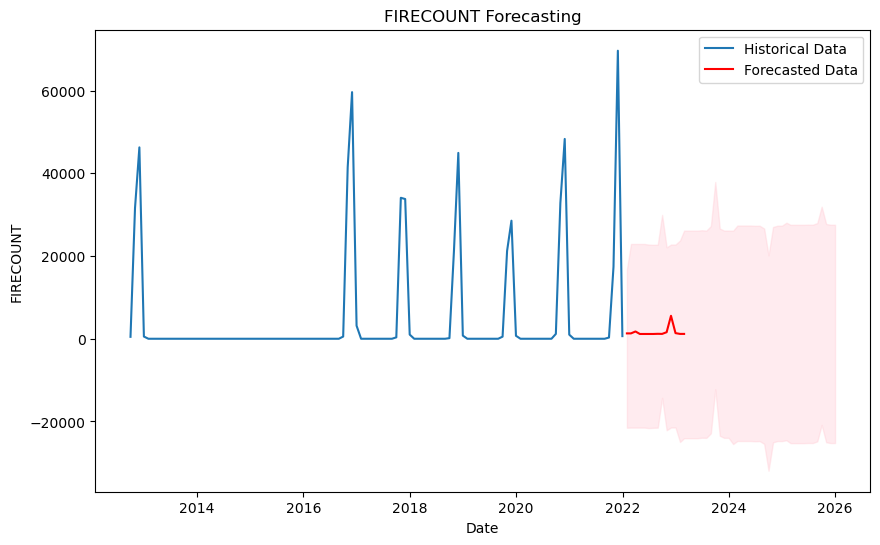

In [16]:
import pandas as pd
from pmdarima import auto_arima
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'D:\\stubble buring\\stubble\\STN1.csv'
data = pd.read_csv(file_path)

# Parse the DATE column as datetime
data['DATE'] = pd.to_datetime(data['DATE'], format='%d-%m-%Y')

# Aggregate daily data into monthly data by summing
data.set_index('DATE', inplace=True)
monthly_data = data.resample('M').sum()

# Fill missing values using linear interpolation for simplicity
monthly_data_imputed = monthly_data.interpolate(method='linear')

# Split the data into training (70%) and testing (30%)
cutoff_year = int(len(monthly_data_imputed) * 0.7)
train_data = monthly_data_imputed.iloc[:cutoff_year]
test_data = monthly_data_imputed.iloc[cutoff_year:]

# For example, we will predict 'FIRECOUNT', you can choose any other column
train_series = train_data['FIRECOUNT']
test_series = test_data['FIRECOUNT']

# Fit Auto-ARIMA model
model = auto_arima(train_series, seasonal=True, m=12, stepwise=True, trace=True)

# Forecast for the next 48 months (4 years)
forecast, conf_int = model.predict(n_periods=48, return_conf_int=True)

# Generate forecasted dates (from January 2022 to December 2025)
forecast_dates = pd.date_range(start='2022-01-01', periods=48, freq='M')

# Display the forecast
forecast_df = pd.DataFrame(forecast, index=forecast_dates, columns=['Forecast'])

# Print predicted values in the requested format
for year in range(2022, 2026):
    forecast_value = forecast_df.loc[f"{year}-12-31", 'Forecast']
    print(f"The predicted value for {year} is {forecast_value:.2f}")

# Plot the results
plt.figure(figsize=(10,6))
plt.plot(monthly_data_imputed.index, monthly_data_imputed['FIRECOUNT'], label='Historical Data')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecasted Data', color='red')
plt.fill_between(forecast_df.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('FIRECOUNT Forecasting')
plt.xlabel('Date')
plt.ylabel('FIRECOUNT')
plt.show()


In [17]:
import pandas as pd
from pmdarima import auto_arima
import plotly.express as px

# Load the data
df = pd.read_csv(r'D:\stubble buring\stubble\STN1.csv')

# Convert 'DATE' to datetime and set it as index
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df.dropna(subset=['DATE'], inplace=True)  # Drop rows with invalid dates
df.set_index('DATE', inplace=True)
df.sort_index(inplace=True)  # Sort the index to make it monotonic

# Handle missing values - forward fill
df.fillna(method='ffill', inplace=True)  # Forward fill to propagate the last valid value

# Check if sorting worked
print(df.index.is_monotonic_increasing)  # Should print True

# Select the desired date range
df = df['2012-09-01':'2021-12-31']  # Ensure slicing works after sorting

# Split the dataset 70:30
split_index = int(len(df) * 0.7)
train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]

# Fit ARIMA model on training data
arima_model = auto_arima(train_data['FIRECOUNT'], seasonal=False, trace=True)
print(arima_model.summary())

# Forecast for the test period
forecast_test = arima_model.predict(n_periods=len(test_data))

# Forecast for the next 48 months (2022-2025)
forecast_future = arima_model.predict(n_periods=48)

# Print the predicted values for the test period
for date, value in zip(test_data.index, forecast_test):
    print(f"The predicted FIRECOUNT for {date.strftime('%Y-%m-%d')} is {value:.2f}")

# Print the predicted values for the years 2022-2025
forecast_dates = pd.date_range(start=test_data.index[-1] + pd.DateOffset(1), periods=48, freq='M')
for date, value in zip(forecast_dates, forecast_future):
    print(f"The predicted FIRECOUNT for {date.strftime('%Y-%m-%d')} is {value:.2f}")

# Visualization (optional)
fig = px.line(title="ARIMA Forecast (2016-09 to 2025)")
fig.add_scatter(x=train_data.index, y=train_data['FIRECOUNT'], mode='lines', name='Training Data')
fig.add_scatter(x=test_data.index, y=test_data['FIRECOUNT'], mode='lines', name='Testing Data')
fig.add_scatter(x=forecast_dates, y=forecast_future, mode='lines', name='Forecast 2022-2025')
fig.show()


C:\Users\goelk\AppData\Local\Temp\ipykernel_20608\613383652.py:15: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



True
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3617.081, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3850.702, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3801.220, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3848.704, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3651.545, Time=0.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3473.056, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3471.070, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3469.303, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3772.941, Time=0.03 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=3471.077, Time=0.05 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=3467.311, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=3

e:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

e:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

e:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

e:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\goelk\AppData\Local\Temp\ipykernel_20608\613383652.py:43: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' 

In [18]:
## 2

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import plotly.express as px

# Load the STN2 dataset
stn2_data = pd.read_csv('D:\stubble buring\stubble\STN2.csv')

# Convert the 'DATE' column to datetime format
stn2_data['DATE'] = pd.to_datetime(stn2_data['DATE'], format='%d-%m-%Y')

# Set the 'DATE' column as the index
stn2_data.set_index('DATE', inplace=True)

# Resample the data to monthly frequency, summing the 'FIRECOUNT' values
stn2_monthly_data = stn2_data['FIRECOUNT'].resample('M').sum()

# Split the data into training and testing (70% training, 30% testing)
train_size = int(len(stn2_monthly_data) * 0.7)
train_data, test_data = stn2_monthly_data[:train_size], stn2_monthly_data[train_size:]

# Fit ARIMA model
arima_model_stn2 = ARIMA(train_data, order=(5, 1, 0))  # Adjust the order based on your model diagnostics
arima_model_stn2_fit = arima_model_stn2.fit()

# Forecast the next 48 months (4 years)
forecast_steps = 48
forecast_stn2 = arima_model_stn2_fit.forecast(steps=forecast_steps)

# Generate forecast date range for 2022-2025
forecast_index = pd.date_range(start='2022-01-01', periods=forecast_steps, freq='M')

# Create a DataFrame for the forecasted values
forecast_df_stn2 = pd.DataFrame({'Date': forecast_index, 'Forecast': forecast_stn2})

# Plot the forecast using Plotly Express
fig_stn2 = px.line(forecast_df_stn2, x='Date', y='Forecast', title="ARIMA Forecast for FIRECOUNT (STN2)", labels={'Date': 'Year', 'Forecast': 'Predicted FIRECOUNT'})
fig_stn2.show()

# Display the forecasted values for 2022-2025
for year in range(2022, 2026):
    predicted_value = forecast_df_stn2[forecast_df_stn2['Date'].dt.year == year]['Forecast'].sum()
    print(f"The predicted value for {year} is {predicted_value:.2f}")


<>:8: SyntaxWarning:

invalid escape sequence '\s'

<>:8: SyntaxWarning:

invalid escape sequence '\s'

C:\Users\goelk\AppData\Local\Temp\ipykernel_20608\1445434846.py:8: SyntaxWarning:

invalid escape sequence '\s'

C:\Users\goelk\AppData\Local\Temp\ipykernel_20608\1445434846.py:17: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

C:\Users\goelk\AppData\Local\Temp\ipykernel_20608\1445434846.py:32: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



The predicted value for 2022 is 82476.28
The predicted value for 2023 is 81156.04
The predicted value for 2024 is 80979.02
The predicted value for 2025 is 80969.23


In [20]:
## 1

In [23]:
import pandas as pd
from pmdarima import auto_arima
import numpy as np
import plotly.express as px
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load and clean data
df = pd.read_csv(r'D:\stubble buring\stubble\STN2.csv')
df.rename(columns={'date': 'DATE'}, inplace=True)
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df.dropna(subset=['DATE'], inplace=True)

# Handle missing values (e.g., interpolation)
df['FIRECOUNT'] = df['FIRECOUNT'].interpolate(method='linear')

# Set DATE as index
df.set_index('DATE', inplace=True)

# Split data into train and test sets
train_ratio = 0.7
split_index = int(len(df) * train_ratio)
train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]

# Fit ARIMA model on training data
arima_model = auto_arima(train_data['FIRECOUNT'], seasonal=False, trace=True)
print(arima_model.summary())

# Forecast for the next 48 months (4 years)
forecast_period = 48
forecast = arima_model.predict(n_periods=forecast_period)

# Create forecast date index for 2022-2025
forecast_dates = pd.date_range(start=train_data.index[-1] + pd.DateOffset(1), periods=forecast_period, freq='M')
forecast_series = pd.Series(forecast, index=forecast_dates)

# Model Evaluation
test_forecast = arima_model.predict(n_periods=len(test_data))
mae = mean_absolute_error(test_data['FIRECOUNT'], test_forecast)
rmse = np.sqrt(mean_squared_error(test_data['FIRECOUNT'], test_forecast))
print(f"Model Evaluation Metrics:\nMAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Plot original data and forecast
fig = px.line(title="ARIMA Forecast with Original Data")
fig.add_scatter(x=train_data.index, y=train_data['FIRECOUNT'], mode='lines', name='Training Data')
fig.add_scatter(x=test_data.index, y=test_data['FIRECOUNT'], mode='lines', name='Testing Data')
fig.add_scatter(x=forecast_dates, y=forecast_series, mode='lines', name='Forecast')
fig.update_layout(xaxis_title="Date", yaxis_title="FIRECOUNT")
fig.show()

# Display yearly predictions
for year, value in zip(range(2022, 2026), forecast[:48:12]):
    print(f"The predicted value for {year} is {value:.2f}")


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=4997.246, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5359.073, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4993.645, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5167.000, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=4994.509, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4994.383, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4995.397, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4988.423, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=5288.506, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=4989.980, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4990.006, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=5118.375, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=4991.986, Time=0.07 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.552 seconds
                      

e:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

e:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\goelk\AppData\Local\Temp\ipykernel_20608\2424403757.py:34: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

e:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

e:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an e

The predicted value for 2022 is 187.53
The predicted value for 2023 is 750.44
The predicted value for 2024 is 785.31
The predicted value for 2025 is 787.47


In [26]:
print("ARIMA Model Summary for STN1:")
print(arima_model_stn1.summary())

print("ARIMA Model Summary for STN2:")
print(arima_model_stn2.summary())


ARIMA Model Summary for STN1:


NameError: name 'arima_model_stn1' is not defined

In [2]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pmdarima import auto_arima
import numpy as np

# Load data
df = pd.read_csv('D:/stubble buring/stubble/STN1.csv')

# Ensure 'DATE' is a datetime column
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df.dropna(subset=['DATE'], inplace=True)  # Drop rows with invalid/missing dates

# Filter data for the range 01-09-2016 to 31-12-2021
df = df[(df['DATE'] >= '2016-09-01') & (df['DATE'] <= '2021-12-31')]

# Handle missing values in 'FIRECOUNT'
df['FIRECOUNT'].fillna(method='ffill', inplace=True)

# Set 'DATE' as index
df.set_index('DATE', inplace=True)

# Resample daily data to monthly data (sum)
df_monthly = df['FIRECOUNT'].resample('M').sum()

# Split the dataset into training (70%) and testing (30%)
split_index = int(len(df_monthly) * 0.7)
train = df_monthly[:split_index]
test = df_monthly[split_index:]

# Fit ARIMA model on training data
arima_model = auto_arima(train, seasonal=False, trace=True)
print(arima_model.summary())

# Forecast for the test period
test_forecast = arima_model.predict(n_periods=len(test))

# Compute MAE and RMSE
mae = mean_absolute_error(test, test_forecast)
rmse = np.sqrt(mean_squared_error(test, test_forecast))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# Forecast for the next 48 months (2022-2025)
forecast_period = 48
forecast = arima_model.predict(n_periods=forecast_period)

# Create forecast date index
forecast_dates = pd.date_range(start='2022-01-01', periods=forecast_period, freq='M')
forecast_series = pd.Series(forecast, index=forecast_dates)

# Display predictions
for year, value in zip(range(2022, 2026), forecast[:48:12]):
    print(f"The predicted value for {year} is {value:.2f}")


C:\Users\goelk\AppData\Local\Temp\ipykernel_10824\2879877561.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FIRECOUNT'].fillna(method='ffill', inplace=True)
C:\Users\goelk\AppData\Local\Temp\ipykernel_10824\2879877561.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['FIRECOUNT'].fillna(method='ffill', inplace=True)
C:\Users\goelk\AppData\Local\Temp\ipykernel_10824\2879877561.py:23: FutureWarning: 'M' is deprecated and will

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=831.867, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=782.751, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=800.395, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=784.706, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=784.546, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=784.689, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=771.244, Time=0.00 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=776.879, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=767.819, Time=0.02 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=769.953, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=769.880, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=769.202, Time=0.01 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=771.850, Time=0.03 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Tota

C:\Users\goelk\AppData\Local\Temp\ipykernel_10824\2879877561.py:49: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start='2022-01-01', periods=forecast_period, freq='M')


In [4]:
import pandas as pd
from pmdarima import auto_arima
import numpy as np
import plotly.express as px
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load and clean data
df = pd.read_csv(r'D:\stubble buring\stubble\STN1.csv')
df.rename(columns={'date': 'DATE'}, inplace=True)
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df.dropna(subset=['DATE'], inplace=True)

# Handle missing values (e.g., interpolation)
df['FIRECOUNT'] = df['FIRECOUNT'].interpolate(method='linear')

# Filter data for the specified date range
df = df[(df['DATE'] >= '2016-09-01') & (df['DATE'] <= '2021-12-31')]

# Set DATE as index
df.set_index('DATE', inplace=True)

# Split data into train and test sets (70:30 ratio)
train_ratio = 0.7
split_index = int(len(df) * train_ratio)
train_data = df.iloc[:split_index]
test_data = df.iloc[split_index:]

# Fit ARIMA model on training data
arima_model = auto_arima(train_data['FIRECOUNT'], seasonal=False, trace=True)
print(arima_model.summary())

# Forecast for the next 48 months (4 years)
forecast_period = 48
forecast = arima_model.predict(n_periods=forecast_period)

# Create forecast date index for 2022-2025
forecast_dates = pd.date_range(start=train_data.index[-1] + pd.DateOffset(1), periods=forecast_period, freq='M')
forecast_series = pd.Series(forecast, index=forecast_dates)

# Model Evaluation
test_forecast = arima_model.predict(n_periods=len(test_data))
mae = mean_absolute_error(test_data['FIRECOUNT'], test_forecast)
rmse = np.sqrt(mean_squared_error(test_data['FIRECOUNT'], test_forecast))
print(f"Model Evaluation Metrics:\nMAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Plot original data and forecast
fig = px.line(title="ARIMA Forecast with Original Data")
fig.add_scatter(x=train_data.index, y=train_data['FIRECOUNT'], mode='lines', name='Training Data')
fig.add_scatter(x=test_data.index, y=test_data['FIRECOUNT'], mode='lines', name='Testing Data')
fig.add_scatter(x=forecast_dates, y=forecast_series, mode='lines', name='Forecast')
fig.update_layout(xaxis_title="Date", yaxis_title="FIRECOUNT")
fig.show()

# Display yearly predictions
for year, value in zip(range(2022, 2026), forecast[:48:12]):
    print(f"The predicted value for {year} is {value:.2f}")


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2910.392, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3076.531, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2909.637, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2964.728, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=2909.839, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2909.104, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2910.465, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2909.113, Time=0.03 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2929.519, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=2904.620, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=2942.919, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=2906.567, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2908.731, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=2906.103, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept

e:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

e:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

C:\Users\goelk\AppData\Local\Temp\ipykernel_10824\4272361579.py:37: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.

e:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

e:\Anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an e

The predicted value for 2022 is 331.68
The predicted value for 2023 is 509.57
The predicted value for 2024 is 510.40
The predicted value for 2025 is 510.40
